# Combining Datasets

Datasets can be combined along the items and time axis

In [1]:
import matplotlib.pyplot as plt
import mikeio

## Concatenate Datasets (along the time axis)

In [2]:
ds1 = mikeio.read("../tests/testdata/tide1.dfs1")
ds1

<mikeio.Dataset>
dims: (time:97, x:10)
time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00 (97 records)
geometry: Grid1D (n=10, dx=0.06667)
items:
  0:  Level <Water Level> (meter)

In [3]:
ds2 = mikeio.read("../tests/testdata/tide2.dfs1") + 0.5  # add offset
ds2


<mikeio.Dataset>
dims: (time:97, x:10)
time: 2019-01-02 00:00:00 - 2019-01-04 00:00:00 (97 records)
geometry: Grid1D (n=10, dx=0.06667)
items:
  0:  Level <Water Level> (meter)

Concatenating data along the time axis can be done with `Dataset.concat`

In [4]:
ds3 = mikeio.Dataset.concat([ds1, ds2])
ds3

<mikeio.Dataset>
dims: (time:145, x:10)
time: 2019-01-01 00:00:00 - 2019-01-04 00:00:00 (145 records)
geometry: Grid1D (n=10, dx=0.06667)
items:
  0:  Level <Water Level> (meter)

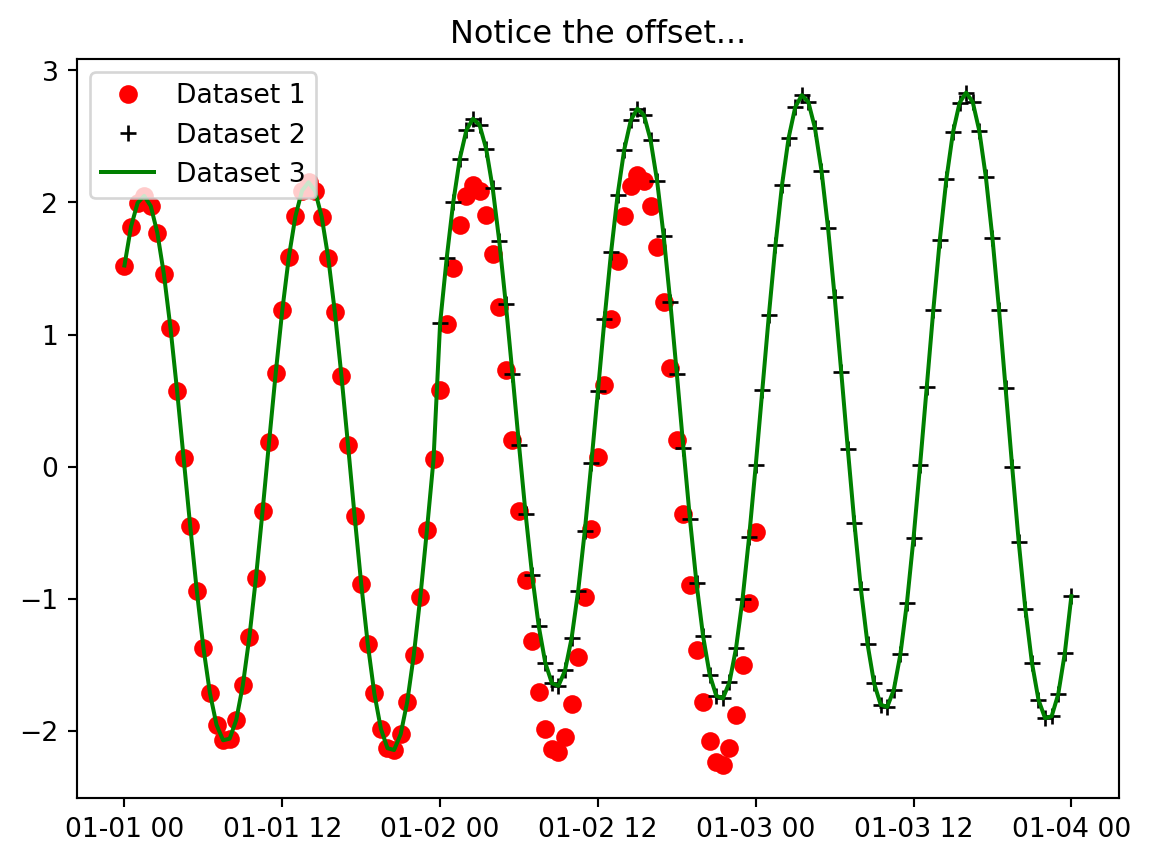

In [5]:
plt.plot(ds1.time, ds1[0].to_numpy()[:,1], 'ro', label="Dataset 1")
plt.plot(ds2.time, ds2[0].to_numpy()[:,1], 'k+', label="Dataset 2")
plt.plot(ds3.time, ds3[0].to_numpy()[:,1], 'g-', label="Dataset 3")
plt.title("Notice the offset...")
plt.legend();

## Merging datasets

In [6]:
dsA = mikeio.read("../tests/testdata/tide1.dfs1")
dsA

<mikeio.Dataset>
dims: (time:97, x:10)
time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00 (97 records)
geometry: Grid1D (n=10, dx=0.06667)
items:
  0:  Level <Water Level> (meter)

In [7]:
dsB = dsA.copy()
dsB = dsB.rename({"Level":"Other_level"})
dsB = dsB + 2
dsB

<mikeio.Dataset>
dims: (time:97, x:10)
time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00 (97 records)
geometry: Grid1D (n=10, dx=0.06667)
items:
  0:  Other_level <Water Level> (meter)

Merge datasets with different items can be done like this:

In [8]:
dsC = mikeio.Dataset.merge([dsA, dsB])
dsC

<mikeio.Dataset>
dims: (time:97, x:10)
time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00 (97 records)
geometry: Grid1D (n=10, dx=0.06667)
items:
  0:  Level <Water Level> (meter)
  1:  Other_level <Water Level> (meter)

Which in this simple case with a single item in each dataset is equivalent to:

In [9]:
daA = dsA[0]
daA

<mikeio.DataArray>
name: Level
dims: (time:97, x:10)
time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00 (97 records)
geometry: Grid1D (n=10, dx=0.06667)

In [10]:
daB = dsB[0]
daB

<mikeio.DataArray>
name: Other_level
dims: (time:97, x:10)
time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00 (97 records)
geometry: Grid1D (n=10, dx=0.06667)

In [11]:
mikeio.Dataset([daA, daB])

<mikeio.Dataset>
dims: (time:97, x:10)
time: 2019-01-01 00:00:00 - 2019-01-03 00:00:00 (97 records)
geometry: Grid1D (n=10, dx=0.06667)
items:
  0:  Level <Water Level> (meter)
  1:  Other_level <Water Level> (meter)